# <a id='toc1_'></a>[Option Pricing Analysis](#toc0_)
A Comparative Study on Five Iranian Options

**Table of contents**<a id='toc0_'></a>    
- [Option Pricing Analysis](#toc1_)    
  - [Theory](#toc1_1_)    
    - [Binomial Option Pricing Model](#toc1_1_1_)    
      - [Assumptions](#toc1_1_1_1_)    
      - [Formulation](#toc1_1_1_2_)    
    - [Trinomial Option Pricing Model](#toc1_1_2_)    
      - [Assumptions](#toc1_1_2_1_)    
      - [Formulation](#toc1_1_2_2_)    
    - [Black-Scholes Model](#toc1_1_3_)    
      - [Assumptions](#toc1_1_3_1_)    
      - [Formulation](#toc1_1_3_2_)    
    - [Monte Carlo Simulation for Option Pricing](#toc1_1_4_)    
      - [Assumptions](#toc1_1_4_1_)    
      - [Formulation](#toc1_1_4_2_)    
  - [Implementation](#toc1_2_)    
    - [Data Preparation](#toc1_2_1_)    
    - [Option Pricing](#toc1_2_2_)    
  - [Execution](#toc1_3_)    
  - [Analysis](#toc1_4_)    
    - [Pricing Methods' Plots](#toc1_4_1_)    
    - [Method Comparisons](#toc1_4_2_)    
    - [Lowest Errors](#toc1_4_3_)    
  - [Discussion](#toc1_5_)    
  - [Further Discussion](#toc1_6_)    
    - [Conintegration Test](#toc1_6_1_)    
    - [Correlation Analysis between Price Difference and Time to Maturity](#toc1_6_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Theory](#toc0_)

### <a id='toc1_1_1_'></a>[Binomial Option Pricing Model](#toc0_)
The Binomial Option Pricing Model is a widely used method for pricing options. Named after its creators, this model is often referred to as the Cox-Ross-Rubinstein model.

#### <a id='toc1_1_1_1_'></a>[Assumptions](#toc0_)
The Binomial Model assumes that the price of the underlying security can only move up or down by a certain amount at each discrete time step, giving rise to a binomial distribution.

#### <a id='toc1_1_1_2_'></a>[Formulation](#toc0_)
We denote:
- $C$ : Call option price
- $S$ : Current price of the underlying
- $K$ : Strike price of the option
- $r$ : Risk-free interest rate
- $u$ : Factor by which the price can increase
- $d$ : Factor by which the price can decrease
- $t$ : Time to expiration
- $n$ : Number of time steps

The factors $u$ and $d$ are calculated as:
$u = e^{\sigma\sqrt{\frac{t}{n}}}$ and 
$d = e^{-\sigma\sqrt{\frac{t}{n}}}$

where $\sigma$ is the volatility of the underlying security and $e$ is the base of natural logarithm.

At each node, we calculate the option price $C$ as:

$C = e^{-rt/n} \left[p \cdot C_{\text{up}} + (1-p) \cdot C_{\text{down}}\right]$

Where:
- $C_{\text{up}}$ : Option price if price goes up
- $C_{\text{down}}$ : Option price if price goes down
- $p$ is the risk-neutral probability, calculated as:

$p = \frac{e^{rt/n} - d}{u - d}$

Starting from the terminal nodes (at expiry), where the option price is simply its intrinsic value (i.e., $\max(S-K, 0)$ for a call option and $\max(K-S, 0)$ for a put option), we use these equations to move backwards to the first node (today) to get the option price.

One of the limitations of the Binomial Model is that it can become computationally intensive as the number of time steps increases. Despite this, the model is still widely used due to its conceptual simplicity and versatility in pricing various types of options.



### <a id='toc1_1_2_'></a>[Trinomial Option Pricing Model](#toc0_)
The Trinomial Option Pricing Model is an advanced method for pricing options that incorporates three potential price movements at each step, adding a middle step that represents no change in price. This method may enhances the accuracy of option pricing by offering an additional degree of flexibility.

#### <a id='toc1_1_2_1_'></a>[Assumptions](#toc0_)
Like the Binomial Model, the Trinomial Model also assumes that the price of the underlying asset can move to one of three potential states at each time step: an upward movement, a downward movement, or no movement.

#### <a id='toc1_1_2_2_'></a>[Formulation](#toc0_)
Let's denote:

- $C$ : Call option price
- $S$ : Current price of the underlying
- $K$ : Strike price of the option
- $r$ : Risk-free interest rate
- $u$ : Factor by which the price can increase
- $d$ : Factor by which the price can decrease (usually $1/u$ for symmetry)
- $t$ : Time to expiration
- $n$ : Number of time steps

At each node, we calculate the option price $C$ as:
$C = e^{-rt/n} \left[p_u \cdot C_{\text{up}} + p_m \cdot C_{\text{middle}} + p_d \cdot C_{\text{down}}\right]$

Where:

- $C_{\text{up}}$ : Option price if price goes up
- $C_{\text{middle}}$ : Option price if price remains the same
- $C_{\text{down}}$ : Option price if price goes down
- $p_u, p_m, p_d$ : are the probabilities of the price moving up, remaining the same, or moving down respectively.

The probabilities $p_u$ and $p_d$ are calculated as:
$p_u = \left(\frac{e^{r \frac{dt}{2}} - e^{-v \sqrt{\frac{dt}{2}}}}{e^{v \sqrt{\frac{dt}{2}}} - e^{-v \sqrt{\frac{dt}{2}}}}\right)^2$ and 
$p_d = \left(\frac{e^{v \sqrt{\frac{dt}{2}}} - e^{r \frac{dt}{2}}}{e^{v \sqrt{\frac{dt}{2}}} - e^{-v \sqrt{\frac{dt}{2}}}}\right)^2$

Where:
- $r$ : Risk-free interest rate
- $v$ : Volatility
- $dt$ : Time step size, calculated as $t/n$ (with $t$ being the time to expiration and $n$ being the number of time steps)

The middle probability $p_m$ can then be calculated as $p_m = 1 - p_u - p_d$.

Starting from the terminal nodes (at expiry), where the option price is simply its intrinsic value (i.e., $\max(S-K, 0)$ for a call option and $\max(K-S, 0)$ for a put option), we move backwards to the first node (today) to get the option price.

The Trinomial model, while more complex in calculations than the Binomial model, provides a more accurate pricing of options, especially for longer-dated and more complex derivative securities.




### <a id='toc1_1_3_'></a>[Black-Scholes Model](#toc0_)
The Black-Scholes model, also known as the Black-Scholes-Merton model, is a mathematical model used to calculate the theoretical price of options, including both call and put options.

#### <a id='toc1_1_3_1_'></a>[Assumptions](#toc0_)
The Black-Scholes model makes a number of assumptions, including:
- The markets are efficient, with no transaction costs or taxes.
- The risk-free rate and volatility are constant over the life of the option.
- The returns on the underlying are normally distributed.

#### <a id='toc1_1_3_2_'></a>[Formulation](#toc0_)
Let's denote:

- $C$ : Call option price
- $P$ : Put option price
- $S$ : Current price of the underlying
- $K$ : Strike price of the option
- $r$ : Risk-free interest rate
- $\sigma$ : Volatility of the underlying
- $t$ : Time to expiration
The Black-Scholes formulas for a call option ($C$) and a put option ($P$) are:

For a call option:
$C = S_0 \Phi(d_1) - K e^{-rt} \Phi(d_2)$

For a put option:
$P = K e^{-rt} \Phi(-d_2) - S_0 \Phi(-d_1)$

Where $\Phi$ is the cumulative distribution function of the standard normal distribution.

$d_1$ and $d_2$ are calculated as:

$d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}}$ and 
$d_2 = d_1 - \sigma \sqrt{t} = \frac{\ln\left(\frac{S}{K}\right) + \left(r - \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}}$

The Black-Scholes model, despite its assumptions that may not hold in the real market, is commonly used because of its simplicity and because it offers a closed-form solution, unlike tree-based models.

### <a id='toc1_1_4_'></a>[Monte Carlo Simulation for Option Pricing](#toc0_)
Monte Carlo Simulation is a computational algorithm that relies on repeated random sampling to obtain numerical results. In the context of financial mathematics, Monte Carlo methods are used for option pricing where analytical solutions may not exist or are difficult to implement.

#### <a id='toc1_1_4_1_'></a>[Assumptions](#toc0_)
The Monte Carlo method assumes that the price of the underlying asset follows a certain stochastic process, the most common one being Geometric Brownian Motion as assumed in the Black-Scholes-Merton model.

#### <a id='toc1_1_4_2_'></a>[Formulation](#toc0_)
- $C$ : Call option price
- $S$ : Current price of the underlying
- $K$ : Strike price of the option
- $r$ : Risk-free interest rate
- $\sigma$ : Volatility of the underlying
- $t$ : Time to expiration
- $n$ : Number of time steps
- $m$ : Number of simulations
Under the Geometric Brownian Motion assumption, the price of the underlying at expiration $S(T)$ can be simulated as follows:
$S(T) = S e^{(r - 0.5\sigma^2)T + \sigma \sqrt{T} Z}$

Where $Z$ is a standard normal random variable.

The payoff of a European call option at expiration is then $\max(S(T) - K, 0)$ and for a put option is $\max(K - S(T), 0)$. To calculate the option price, we simulate $S(T)$ for $m$ paths, calculate the payoff for each path, take the average, and discount it back to today.

For a call option:
$C = e^{-rT} \frac{1}{m} \sum_{i=1}^{m} \max(S_i(T) - K, 0)$

For a put option:
P = e^{-rT} \frac{1}{m} \sum_{i=1}^{m} \max(K - S_i(T), 0)

The Monte Carlo method is very flexible and can handle a variety of different option types and complex payoffs. However, it can be computationally intensive, especially for a large number of paths and time steps.


## <a id='toc1_2_'></a>[Implementation](#toc0_)

### <a id='toc1_2_1_'></a>[Data Preparation](#toc0_)

This report's analysis relies on various purpose-built classes and functions housed within the src.data module of the project. The following table provides an overview of these key components, detailing their roles and functionalities in the data processing and analysis pipeline:

| Component | Type | Description |
|---|---|---|
| `Option` | Class | A `namedtuple` defined in the `src.data` module, encapsulating the metadata associated with an individual option. |
| `fetch_data` | Function | A function housed in the `src.data` module. It retrieves the one-year historical price data for an underlying stock, as well as information about the option itself. |
| `add_std` | Function | This function, located in the `src.data` module, is designed to append an annualized rolling standard deviation of the returns **(based on a 90-day window)** of the underlying stocks to the primary DataFrame. |
| `add_rf` | Function | Found in the `src.data` module, this function's task is to incorporate an **annualized 90-day risk-free rate** to the primary DataFrame. The data source for this information is the *Pouya Financial Processing Firm from Mofid Holding*. |
| `add_T` | Function | This function, part of the `src.data` module, is tasked with adding the daily time-to-maturity (expressed as a fraction of a year) to the main DataFrame. |


To better illustrate the role and application of these key components, let's delve into an example that showcases their utilization and the corresponding outputs produced. This example will shed light on how these functions interact and contribute to the overall data processing and analysis pipeline of the project:

In [209]:
import pandas as pd

# define an option
from src.data import Option
option1 = Option(
    tag="SHASTA_CALL",
    stock_symbol="شستا",
    option_symbol="ضستا6009",
    strike=1365,
    maturity_date="1402-06-08",
    call=True,
)

# read data from tsetmc
from src.data import fetch_data
data=fetch_data(option1)

# add std, rf, T to datafarame
from src.data import add_std, add_rf, add_T
data=add_std(data)
data=add_rf(data)
data = add_T(option1, data)

data.tail(10)

,date,S0,actual_option,std,rf,T
273,2023-06-14,1295.0,167.0,0.358240,0.2660,0.210959
274,2023-06-17,1290.0,141.0,0.355120,0.2612,0.202740
275,2023-06-18,1273.0,128.0,0.355566,0.2534,0.200000
276,2023-06-19,1281.0,129.0,0.355306,0.2512,0.197260
277,2023-06-20,1297.0,133.0,0.354314,0.2541,0.194521
278,2023-06-21,1316.0,145.0,0.351377,0.2622,0.191781
279,2023-06-24,1317.0,134.0,0.350917,0.2622,0.183562
280,2023-06-25,1335.0,135.0,0.341784,0.2622,0.180822
281,2023-06-26,1329.0,126.0,0.342021,0.2622,0.178082
282,2023-06-27,1304.0,97.0,0.343904,0.2622,0.175342


### <a id='toc1_2_2_'></a>[Option Pricing](#toc0_)

In order to implement the four option pricing methods—Binomial, Trinomial, Black-Scholes, and Monte Carlo—we have defined four corresponding classes within the src.option module. Each of these classes is tasked with calculating the option price based on its respective model. Furthermore, all classes are equipped with an add_price method to seamlessly integrate the computed option price into our main DataFrame. Below, you'll find a more detailed overview of these classes:

| Component | Type | Description |
|---|---|---|
| `Binomial` | Class | Located in the `src.option` module, this class calculates the binomial option price using a model with **150 steps**. |
| `Trinomial` | Class | This class, defined in the `src.option` module, computes the trinomial option price using a model with **150 steps**. |
| `BLS` | Class | Part of the `src.option` module, the `BLS` class is designed to calculate the option price based on the Black-Scholes model. |
| `MonteCarlo` | Class | This class, found in the `src.option` module, executes the Monte Carlo simulation to estimate the option price over **10,000 paths**. |

To better understand the practical implementation and functionality of these classes, let's walk through an illustrative example. This demonstration will highlight how these classes operate and how the add_price method allows us to integrate the computed option price into the main DataFrame seamlessly.

In [210]:
from src.options import Bionomial
data = Bionomial.add_price(option1, data)

from src.options import Trinomial
data = Trinomial.add_price(option1, data)

from src.options import BLS
data = BLS.add_price(option1, data)

from src.options import MontCarlo
data = MontCarlo.add_price(option1, data)

data.tail(10)

,date,S0,actual_option,std,rf,T,binPrice,triPrice,blsPrice,mcPrice
273,2023-06-14,1295.0,167.0,0.358240,0.2660,0.210959,87.207926,43.332926,87.026275,86.884824
274,2023-06-17,1290.0,141.0,0.355120,0.2612,0.202740,80.189426,40.011807,80.070522,80.336725
275,2023-06-18,1273.0,128.0,0.355566,0.2534,0.200000,69.611659,35.033362,69.761184,67.909970
276,2023-06-19,1281.0,129.0,0.355306,0.2512,0.197260,72.311064,36.333837,72.439964,70.873492
277,2023-06-20,1297.0,133.0,0.354314,0.2541,0.194521,79.935345,39.745034,79.761904,79.631021
278,2023-06-21,1316.0,145.0,0.351377,0.2622,0.191781,89.382212,44.721311,89.446155,89.984800
279,2023-06-24,1317.0,134.0,0.350917,0.2622,0.183562,86.711099,43.381552,86.769417,86.288496
280,2023-06-25,1335.0,135.0,0.341784,0.2622,0.180822,94.211406,47.209304,94.120442,94.814782
281,2023-06-26,1329.0,126.0,0.342021,0.2622,0.178082,89.494952,44.902353,89.559379,90.042508
282,2023-06-27,1304.0,97.0,0.343904,0.2622,0.175342,75.173494,37.333871,75.008219,74.817697


## <a id='toc1_3_'></a>[Execution](#toc0_)

As we have laid down the foundation by understanding the theory and implementation details, let's now transition into the execution phase of our analysis. In this section, we will put our classes and functions into action, applying them to real-world data. This will allow us to ascertain the efficacy of each pricing model in a practical scenario.

Firstly, we commence by defining five distinct options from the Iranian market, each featuring varying maturity dates. Among these options, four are 'Call Options' while one is a 'Put Option'. Detailed attributes of each option, including their type, underlying asset, strike price, and expiration date, are clearly outlined in the subsequent section:

In [211]:
option1 = Option(
    tag="SHASTA_CALL",
    stock_symbol="شستا",
    option_symbol="ضستا6009",
    strike=1365,
    maturity_date="1402-06-08",
    call=True,
)
option2 = Option(
    tag="KHODRO_CALL",
    stock_symbol="خودرو",
    option_symbol="ضخود8024",
    strike=4000,
    maturity_date="1402-08-03",
    call=True,
)
option3 = Option(
    tag="SHASTA_PUT",
    stock_symbol="شستا",
    option_symbol="طستا6010",
    strike=1465,
    maturity_date="1402-06-08",
    call=False,
)
option4 = Option(
    tag="DEY_CALL",
    stock_symbol="دی",
    option_symbol="ضدی500",
    strike=800,
    maturity_date="1402-05-18",
    call=True,
)
option5 = Option(
    tag="FAKHOOZ_CALL",
    stock_symbol="فخوز",
    option_symbol="ضخوز6002",
    strike=4000,
    maturity_date="1402-06-01",
    call=True,
)


Following the option definition, we assemble these five options into a list, facilitating their manipulation within iterative processes in the subsequent steps of our analysis. Additionally, we assign a unique tag to each option. These tags serve not only as identifiers but also aid in the generation of comprehensible and distinguishable visual representations in our plots later on:

In [212]:
options = [option1, option2, option3, option4, option5]
option_tags = [f'{option.tag} {option.maturity_date}' for option in options]

Lastly, we initialize an empty list named results, designed to store the DataFrame outputs from our computations. For each option in our list, we apply the four option pricing models encapsulated within the classes in the src.option module. The resultant DataFrame, containing calculated prices for each method, is subsequently appended to the results list. This process not only streamlines our analysis but also provides an organized and consolidated set of results for further examination:

In [154]:
results: list[pd.DataFrame] = []

for option in options:
    data = fetch_data(option)
    data = add_std(data)
    data = add_rf(data)
    data = add_T(option, data)

    for method in [Bionomial, Trinomial, BLS, MontCarlo]:
        data = method.add_price(option, data)
    results.append(data)

## <a id='toc1_4_'></a>[Analysis](#toc0_)

Having executed our option pricing models on the selected options, we now arrive at the critical stage of analysis. In this section, we will dive deep into the results obtained from each pricing model, investigating their patterns, similarities, and discrepancies. Through comparative and interpretive analysis, we aim to draw meaningful insights about the performance of each model, ultimately seeking to identify the most accurate and efficient method for pricing options within the context of the Iranian stock market.

In order to carry out our analysis effectively, we have utilized several key functions designed specifically for this section. Here is a brief overview of these functions and their corresponding roles:

| Function | Location | Description |
|---|---|---|
| `plot_methods` | `src.plot` | This function is designed to generate a comprehensive plot that exhibits the actual option price alongside a chosen pricing method and the underlying stock price itself. |
| `get_errs` | `src.analysis` | This function's role is to calculate the Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) for each pricing method, aiding in the evaluation of their accuracy. |
| `plot_errs` | `src.plot` | This function is tasked with visualizing the error of each pricing method for each option, offering a clear comparative view of the model's performances. |


### <a id='toc1_4_1_'></a>[Pricing Methods' Plots](#toc0_)

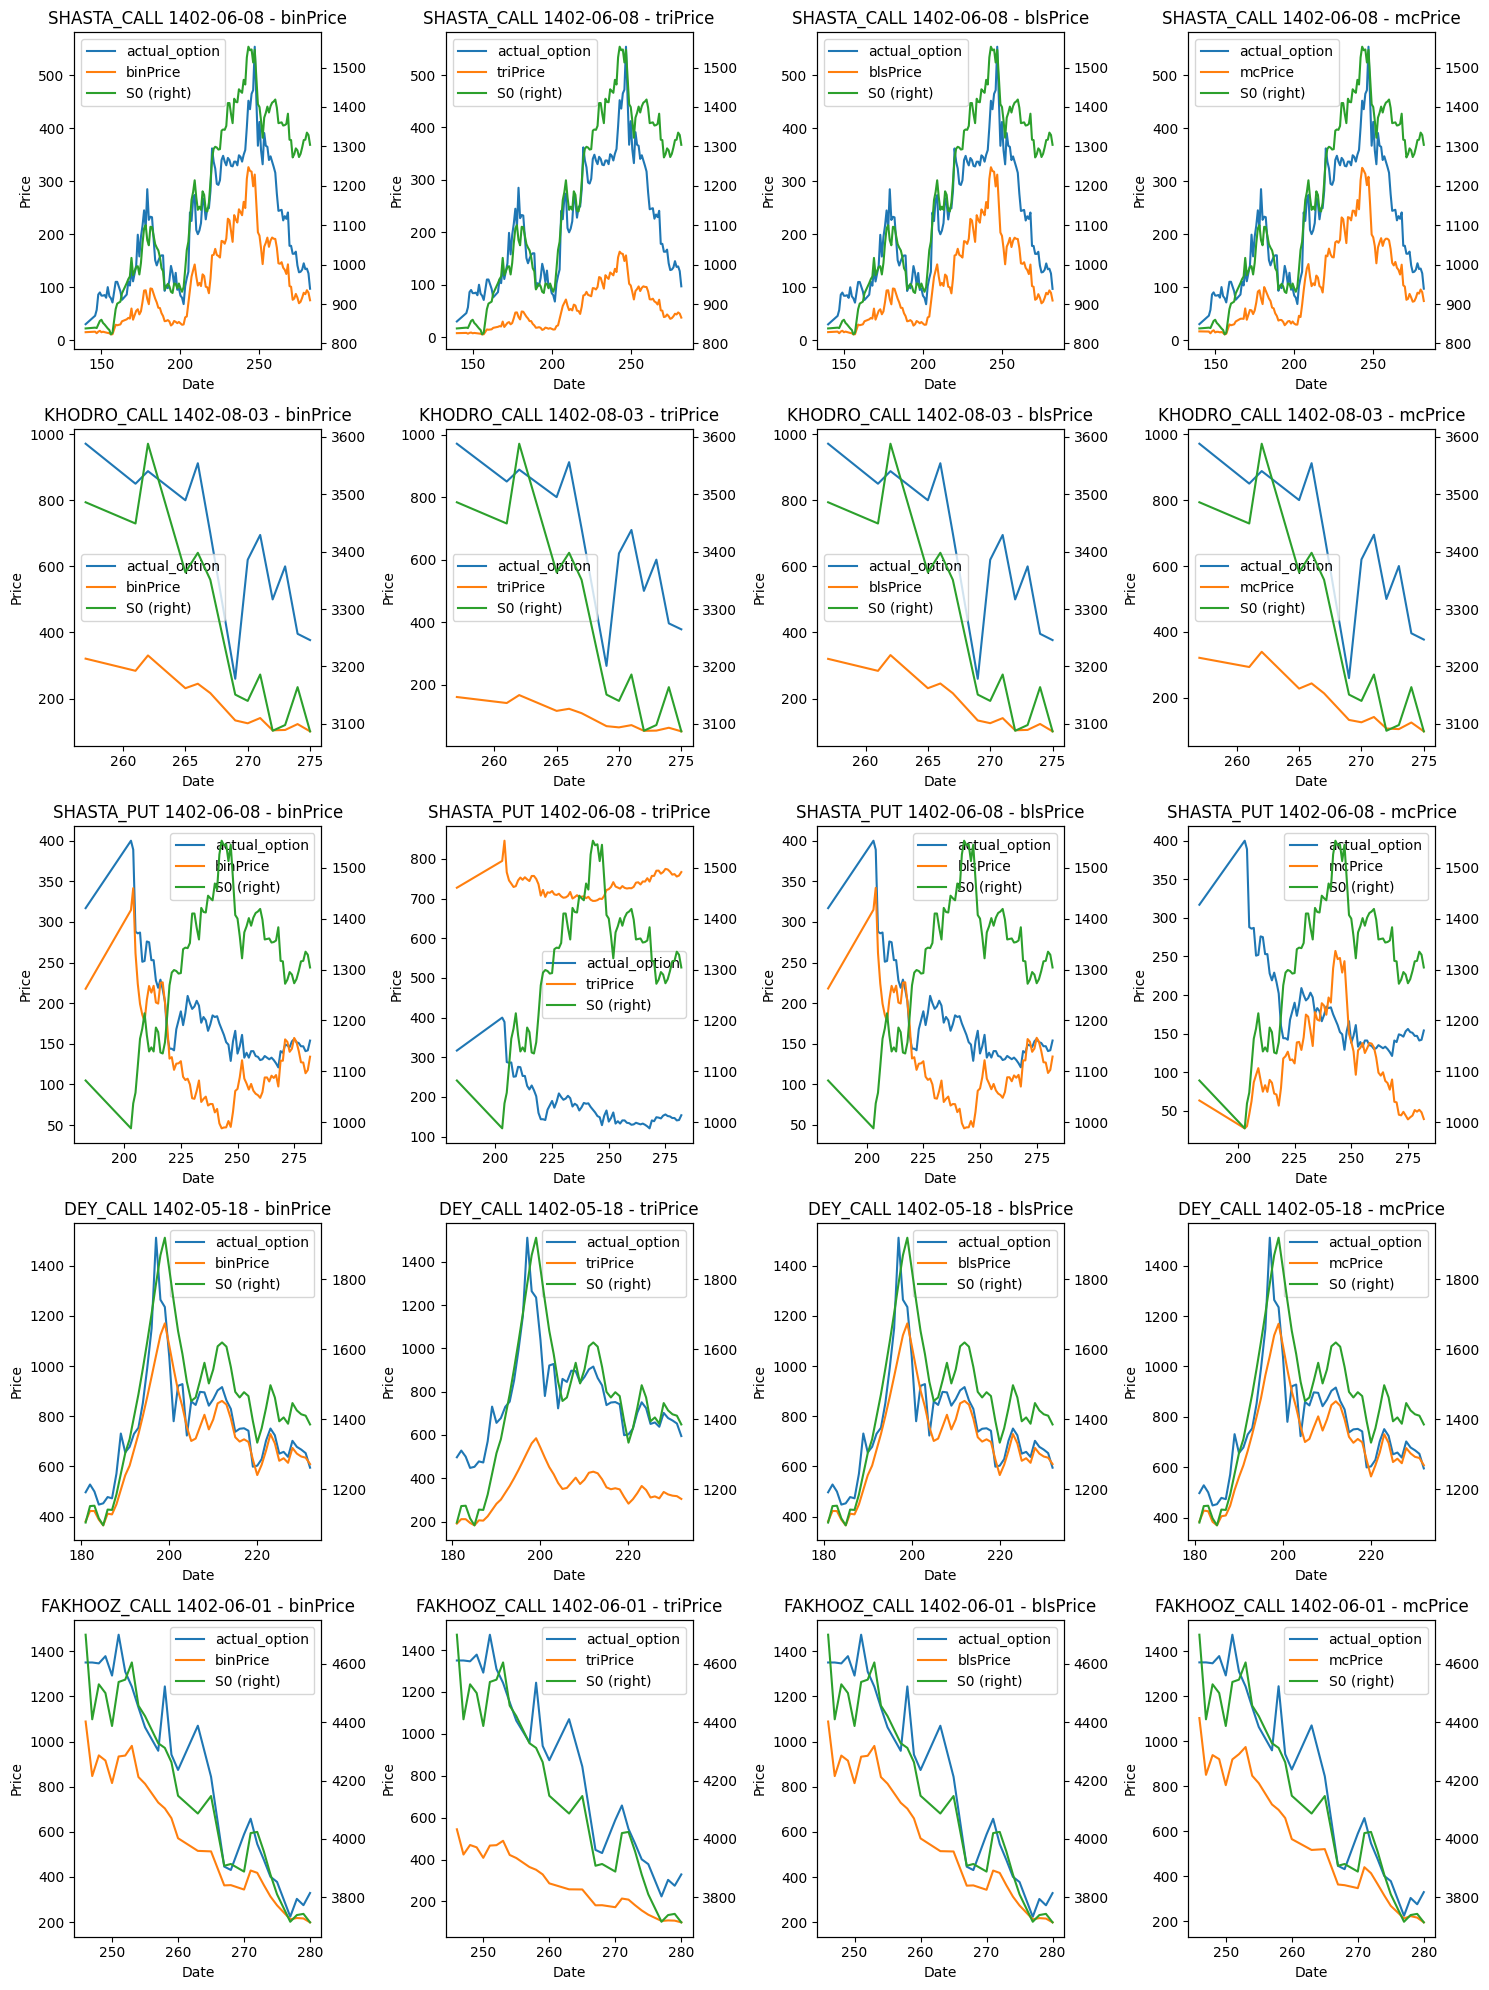

In [198]:
from src.plot import plot_methods
plot_methods(results, option_tags)

### <a id='toc1_4_2_'></a>[Method Comparisons](#toc0_)

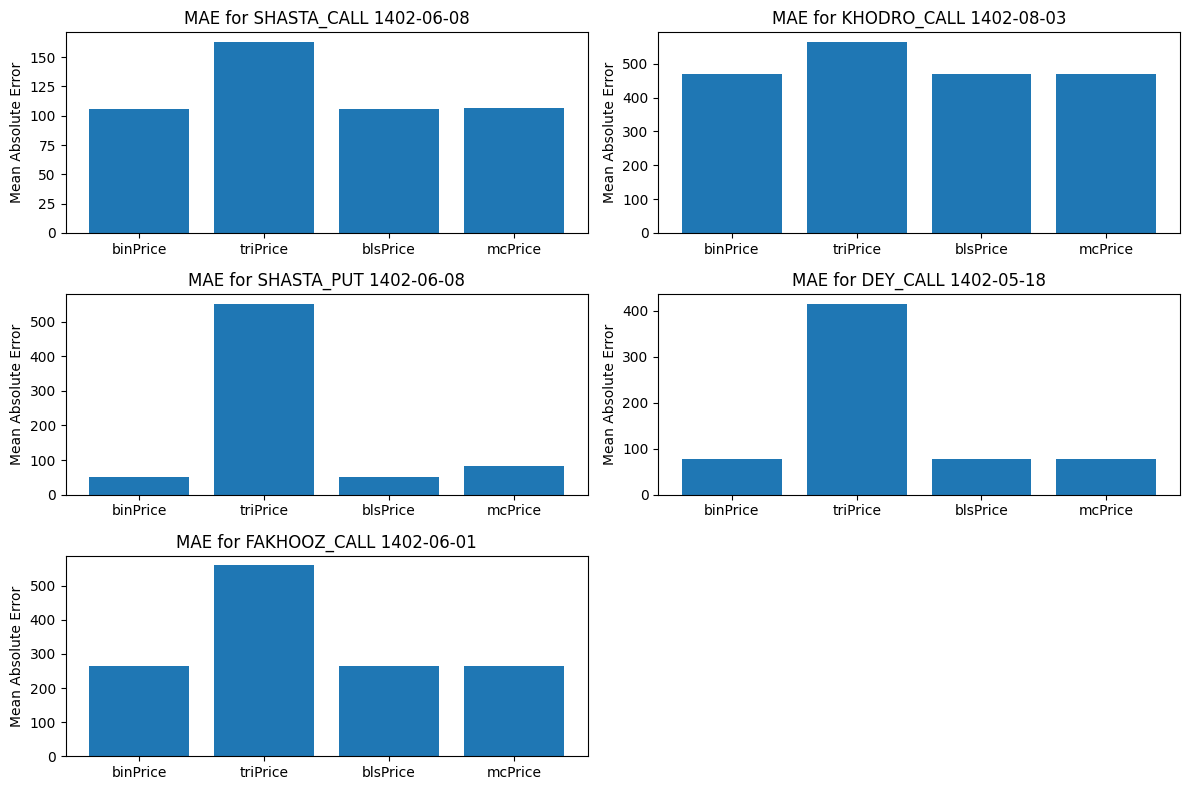

In [203]:
from src.analysis import get_errs
errors = get_errs(results, option_tags)

from src.plot import plot_errs
plot_errs(errors, option_tags)

### <a id='toc1_4_3_'></a>[Lowest Errors](#toc0_)

In [204]:
# Calculate the mean MAE and RMSE for each method
average_errors = errors.groupby('Method')[['MAE', 'RMSE']].mean()

# Print the method with the lowest average MAE and RMSE
best_method_mae = average_errors['MAE'].idxmin()
best_method_rmse = average_errors['RMSE'].idxmin()

print(f"The method with the lowest average MAE is {best_method_mae}.")
print(f"The method with the lowest average RMSE is {best_method_rmse}.")

The method with the lowest average MAE is blsPrice.
The method with the lowest average RMSE is binPrice.


## <a id='toc1_5_'></a>[Discussion](#toc0_)

Our analysis has yielded some intriguing, albeit not entirely promising, results. Across all employed methods, the calculated option prices consistently undershoot the actual prices, often to the extent of being nearly half. This systematic discrepancy implies potential external factors in the market that the models may not account for, or inherent limitations within the models themselves.

Interestingly, the Black-Scholes, Binomial, and Monte Carlo methods yield relatively similar results, a consistency that aligns with theoretical expectations given the shared principles underpinning these models. However, the Trinomial method diverges noticeably, providing estimations that are significantly off the mark. This divergence could potentially be attributed to the inherent complexity of the Trinomial model. Given its higher number of possible paths for the price of the underlying asset, it might be more sensitive to specific parameters or market conditions that are not adequately captured in our dataset. Additionally, the Trinomial model might require a higher number of steps for a more accurate approximation, which could lead to results that differ from those of the other models when the same number of steps is used.

Moreover, despite the underestimation, the calculated prices' fluctuations mirror those of the actual prices, demonstrating that the models can capture the dynamics and volatility of the options to a certain degree.

To validate our calculations, we cross-verified the results using online option pricing calculators, which confirmed the accuracy of our computations. This further emphasizes that the observed discrepancies likely stem from model limitations or unaccounted-for market factors rather than calculation errors.

Upon comparative evaluation, it appears that the Black-Scholes and Binomial pricing methods offer a marginally superior performance over the others. However, considering the significant underestimation common to all methods, further refinement and exploration may be necessary to enhance the models' predictive accuracy.

## <a id='toc1_6_'></a>[Further Discussion](#toc0_)
As we progress in our examination of the results, we find it beneficial to delve into an additional layer of analysis in this 'Further Discussion' section. In this part, we extend our investigation beyond mere comparison of the prices. We aim to probe into specific properties and behavior of the calculated options prices obtained from the different pricing models.

### <a id='toc1_6_1_'></a>[Conintegration Test](#toc0_)
Upon examining the plotted data, I observed that despite the pronounced differences between the actual and calculated prices, their overall trajectories appeared to move in a similar fashion. This synchronicity led me to conduct a cointegration test, a statistical procedure that determines whether two or more time series share a common stochastic trend.

Given that both the actual and calculated prices are heavily influenced by the stock price (S0), it would be reasonable to expect some degree of cointegration between them. Indeed, the results of the cointegration test, conducted using the Statsmodels library, substantiate this hypothesis. The vast majority of the series pairs demonstrated significant cointegration, marked by p-values below the conventional threshold of 0.05. This suggests that while the models might not accurately predict the exact prices, they can reliably track the directional movements of the actual prices over time.

Below are the detailed results of the cointegration test:

In [213]:
from src.analysis import get_coint_df
get_coint_df(results, option_tags)

,Option,Method,p-value,is-coint
0,SHASTA_CALL 1402-06-08,binPrice,0.034389,True
1,SHASTA_CALL 1402-06-08,triPrice,0.035417,True
2,SHASTA_CALL 1402-06-08,blsPrice,0.034015,True
3,SHASTA_CALL 1402-06-08,mcPrice,0.038762,True
4,KHODRO_CALL 1402-08-03,binPrice,0.051072,False
5,KHODRO_CALL 1402-08-03,triPrice,0.050677,False
6,KHODRO_CALL 1402-08-03,blsPrice,0.050552,False
7,KHODRO_CALL 1402-08-03,mcPrice,0.011676,True
8,SHASTA_PUT 1402-06-08,binPrice,0.778009,False
9,SHASTA_PUT 1402-06-08,triPrice,0.252878,False


### <a id='toc1_6_2_'></a>[Correlation Analysis between Price Difference and Time to Maturity](#toc0_)
Additionally, I probed the relationship between the price difference (i.e., the absolute difference between the actual price and the calculated price) and the time to maturity (T). Theoretically, as the time to maturity decreases, the uncertainty surrounding the option's payoff diminishes, converging to a known value at maturity. Consequently, one would expect the price difference to shrink as T decreases, implying a positive correlation between the two.

To test this hypothesis, I used the Pearson correlation coefficient, a measure of linear correlation between two variables. A significance test was also conducted to ascertain the robustness of the observed correlation.

Indeed, the findings largely corroborated this expectation. In most instances, a significant positive correlation was detected, indicating that the price difference tends to reduce as we approach the option's maturity. This provides some reassurance that while the models may not perfectly estimate the actual prices, they seem to converge towards the actual value as the time to maturity lessens.

Here are the detailed results of the Pearson correlation test:

In [214]:
from src.analysis import get_is_diff_correlated
get_is_diff_correlated(results, option_tags)

,Option,Method,Correlation,p-value,is-signf
0,SHASTA_CALL 1402-06-08,binPrice,-0.248994,3.989438e-03,False
1,SHASTA_CALL 1402-06-08,triPrice,-0.477423,7.116900e-09,False
2,SHASTA_CALL 1402-06-08,blsPrice,-0.251453,3.633056e-03,False
3,SHASTA_CALL 1402-06-08,mcPrice,-0.250844,3.718592e-03,False
4,KHODRO_CALL 1402-08-03,binPrice,0.622053,2.320042e-02,True
5,KHODRO_CALL 1402-08-03,triPrice,0.732690,4.389953e-03,True
6,KHODRO_CALL 1402-08-03,blsPrice,0.622535,2.306289e-02,True
7,KHODRO_CALL 1402-08-03,mcPrice,0.613738,2.567096e-02,True
8,SHASTA_PUT 1402-06-08,binPrice,0.341684,1.796945e-03,True
9,SHASTA_PUT 1402-06-08,triPrice,-0.890833,8.569599e-29,False
